In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.model_selection import GridSearchCV

from statsmodels.stats.proportion import proportion_confint

In [2]:
loan_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
loan_df.isna().values.any()
# There are no missing values in column.

False

In [5]:
loan_df.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

In [6]:
# here do not need 'ID' column, so drop it from 'loan_df' dataframe.
# Here I'm using inplace=True, changes should affect on same dataframe.
loan_df.drop(columns='ID',inplace=True)

In [7]:
#Let's see the loan_df shape and head and tail.
print(f'Num of rows == {loan_df.shape[0]} and Num of columns == {loan_df.shape[1]}')
loan_df.head(10)

Num of rows == 5000 and Num of columns == 13


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [8]:
loan_df.tail(10)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [9]:
# Check for descriptive of data
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


Analysing Age

Min age 23 and Max age 67


-0.02934068151284029

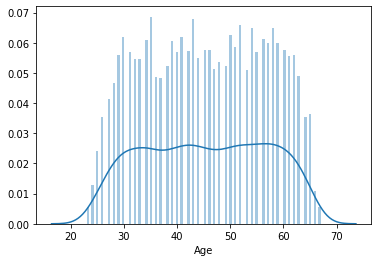

In [10]:
#Let's see the distribution of age
sns.distplot(loan_df.Age, bins=100)
print(f'Min age {loan_df.Age.min()} and Max age {loan_df.Age.max()}')
#Let's check skewness of age
loan_df.Age.skew()

#Here, I can say, Age is normaly distrubutted.

Analysing Experience

Min Experience -3 and Max Experience 43


-0.026324688402384513

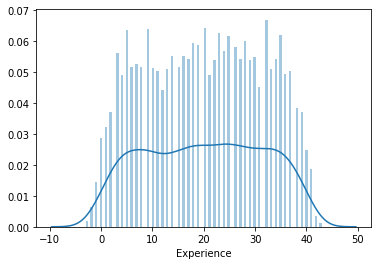

In [11]:
#Let's see the distribution of Experience
sns.distplot(loan_df.Experience, bins=100)
print(f'Min Experience {loan_df.Experience.min()} and Max Experience {loan_df.Experience.max()}')
#Let's check skewness of Experience
loan_df.Experience.skew()

#Here, I can say, Experience is normaly distrubutted.

In [12]:
#But, check experience for less than 0. Because professional experience can not be less than 0.
# Unique vales of Experience before replacing with mean.
loan_df.Experience.unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [13]:
# so replace all values which are less than 0 with mean. 
# Here I'am using mean because 'Expereice' independent variable is numeric and is not skwed much.

def replaceExp_lessThan_0(df):
    df = df
    replaceValue = df.Experience.median()
    df.Experience[df.Experience < 0] = replaceValue
    df.Experience = df.Experience.astype(int)
    return df
loan_df = replaceExp_lessThan_0(loan_df)
# Unique vales of Experience after replacing with mean.
loan_df.Experience.unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

Analysing Income

Min Income 8 and Max Income 224


0.8413386072610816

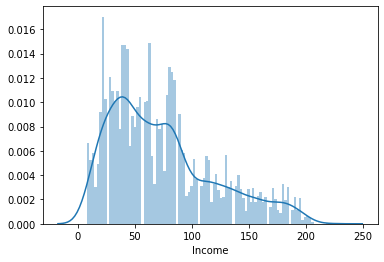

In [14]:
#Let's see the distribution of Income
sns.distplot(loan_df.Income, bins=100)
print(f'Min Income {loan_df.Income.min()} and Max Income {loan_df.Income.max()}')
#Let's check skewness of Income
loan_df.Income.skew()

#Here, I can say, Income is not normaly distrubutted. It is positively skewed. Even though we can consider this.

Min Family size 1 and Max Family size 4


0.15522066944367582

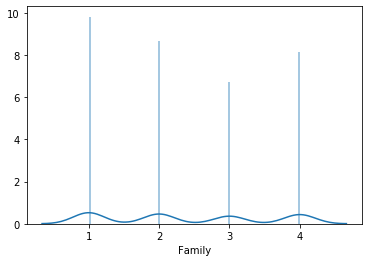

In [15]:
#Let's see the distribution of Family
sns.distplot(loan_df.Family, bins=100)
print(f'Min Family size {loan_df.Family.min()} and Max Family size {loan_df.Family.max()}')
#Let's check skewness of Family
loan_df.Family.skew()

Min CCAvg 0.0 and Max CCAvg 10.0


1.5984433366678663

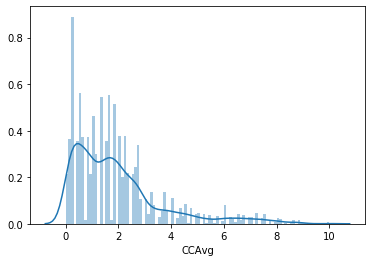

In [16]:
#Let's see the distribution of CCAvg
sns.distplot(loan_df.CCAvg, bins=100)
print(f'Min CCAvg {loan_df.CCAvg.min()} and Max CCAvg {loan_df.CCAvg.max()}')
#Let's check skewness of CCAvg
loan_df.CCAvg.skew()

#Here, I can say, CCAvg is normaly distrubutted.  It is positively skewed. Even though we can consider this.

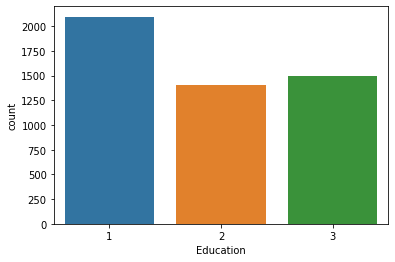

In [17]:
# Check for education distribution
sns.countplot(loan_df['Education'])

*  As we can see that Eduction is a categorical feaure. So we can make it int or categorical. And we will make of type catgorical feature 

In [18]:
loan_df['Education'] = loan_df['Education'].astype('category')

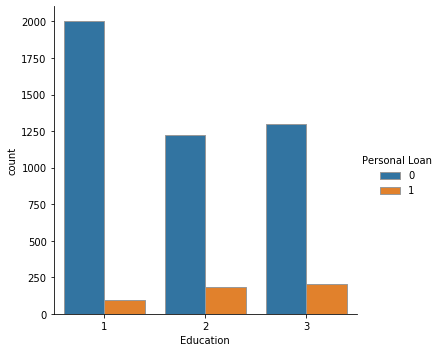

In [19]:
sns.catplot("Education",hue="Personal Loan", kind="count", edgecolor=".6",data=loan_df)

Anaylise Mortgage

Min Mortgage 0 and Max Mortgage 635


2.1040023191079444

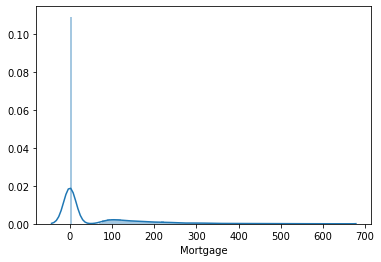

In [20]:
#Let's see the distribution of Mortgage
sns.distplot(loan_df.Mortgage, bins=100)
print(f'Min Mortgage {loan_df.Mortgage.min()} and Max Mortgage {loan_df.Mortgage.max()}')
#Let's check skewness of Mortgage
loan_df.Mortgage.skew()

#Here, I can say, Mortgage is not normaly distrubutted. It is positively skewed. Even though we can consider this.

Analyse Securities account

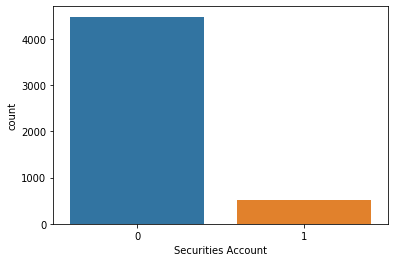

In [21]:
#Let's see the distribution of Securities Account
sns.countplot(loan_df['Securities Account'])

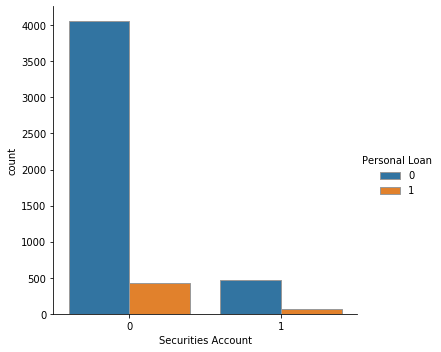

In [22]:
sns.catplot("Securities Account",hue="Personal Loan", kind="count", edgecolor=".6",data=loan_df)

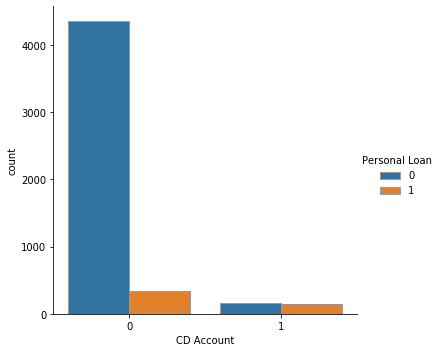

In [23]:
sns.catplot("CD Account",hue="Personal Loan", kind="count", edgecolor=".6",data=loan_df)
#Here we can see that , bank has given loan to almost all user who has submitted certificate of deposit

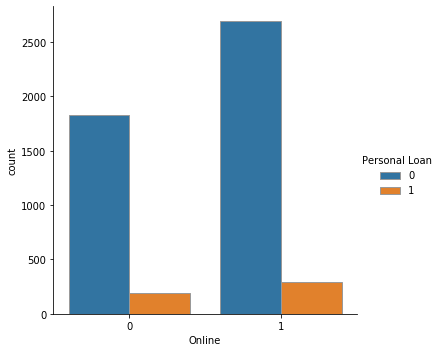

In [24]:
sns.catplot("Online",hue="Personal Loan", kind="count", edgecolor=".6",data=loan_df)

In [25]:
corr = loan_df.corr()
corr.style.background_gradient(cmap="coolwarm")

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1,0.977182,-0.0552686,-0.0292163,-0.0464177,-0.0520122,-0.0125386,-0.00772562,-0.000436242,0.00804255,0.0137024,0.00768104
Experience,0.977182,1,-0.0490463,-0.028492,-0.0455279,-0.0487181,-0.0133654,-0.0140132,-0.000465454,0.00552619,0.0134592,0.00883401
Income,-0.0552686,-0.0490463,1,-0.0164098,-0.157501,0.645984,0.206806,0.502462,-0.0026165,0.169738,0.0142059,-0.00238501
ZIP Code,-0.0292163,-0.028492,-0.0164098,1,0.0117782,-0.00406068,0.00738338,0.000107376,0.00470424,0.0199719,0.0169901,0.00769139
Family,-0.0464177,-0.0455279,-0.157501,0.0117782,1,-0.109275,-0.0204449,0.061367,0.0199941,0.0141104,0.010354,0.0115881
CCAvg,-0.0520122,-0.0487181,0.645984,-0.00406068,-0.109275,1,0.109905,0.366889,0.0150863,0.136534,-0.00361101,-0.00668949
Mortgage,-0.0125386,-0.0133654,0.206806,0.00738338,-0.0204449,0.109905,1,0.142095,-0.00541097,0.0893111,-0.0059949,-0.00723092
Personal Loan,-0.00772562,-0.0140132,0.502462,0.000107376,0.061367,0.366889,0.142095,1,0.0219539,0.316355,0.00627782,0.00280151
Securities Account,-0.000436242,-0.000465454,-0.0026165,0.00470424,0.0199941,0.0150863,-0.00541097,0.0219539,1,0.317034,0.0126275,-0.0150283
CD Account,0.00804255,0.00552619,0.169738,0.0199719,0.0141104,0.136534,0.0893111,0.316355,0.317034,1,0.17588,0.278644


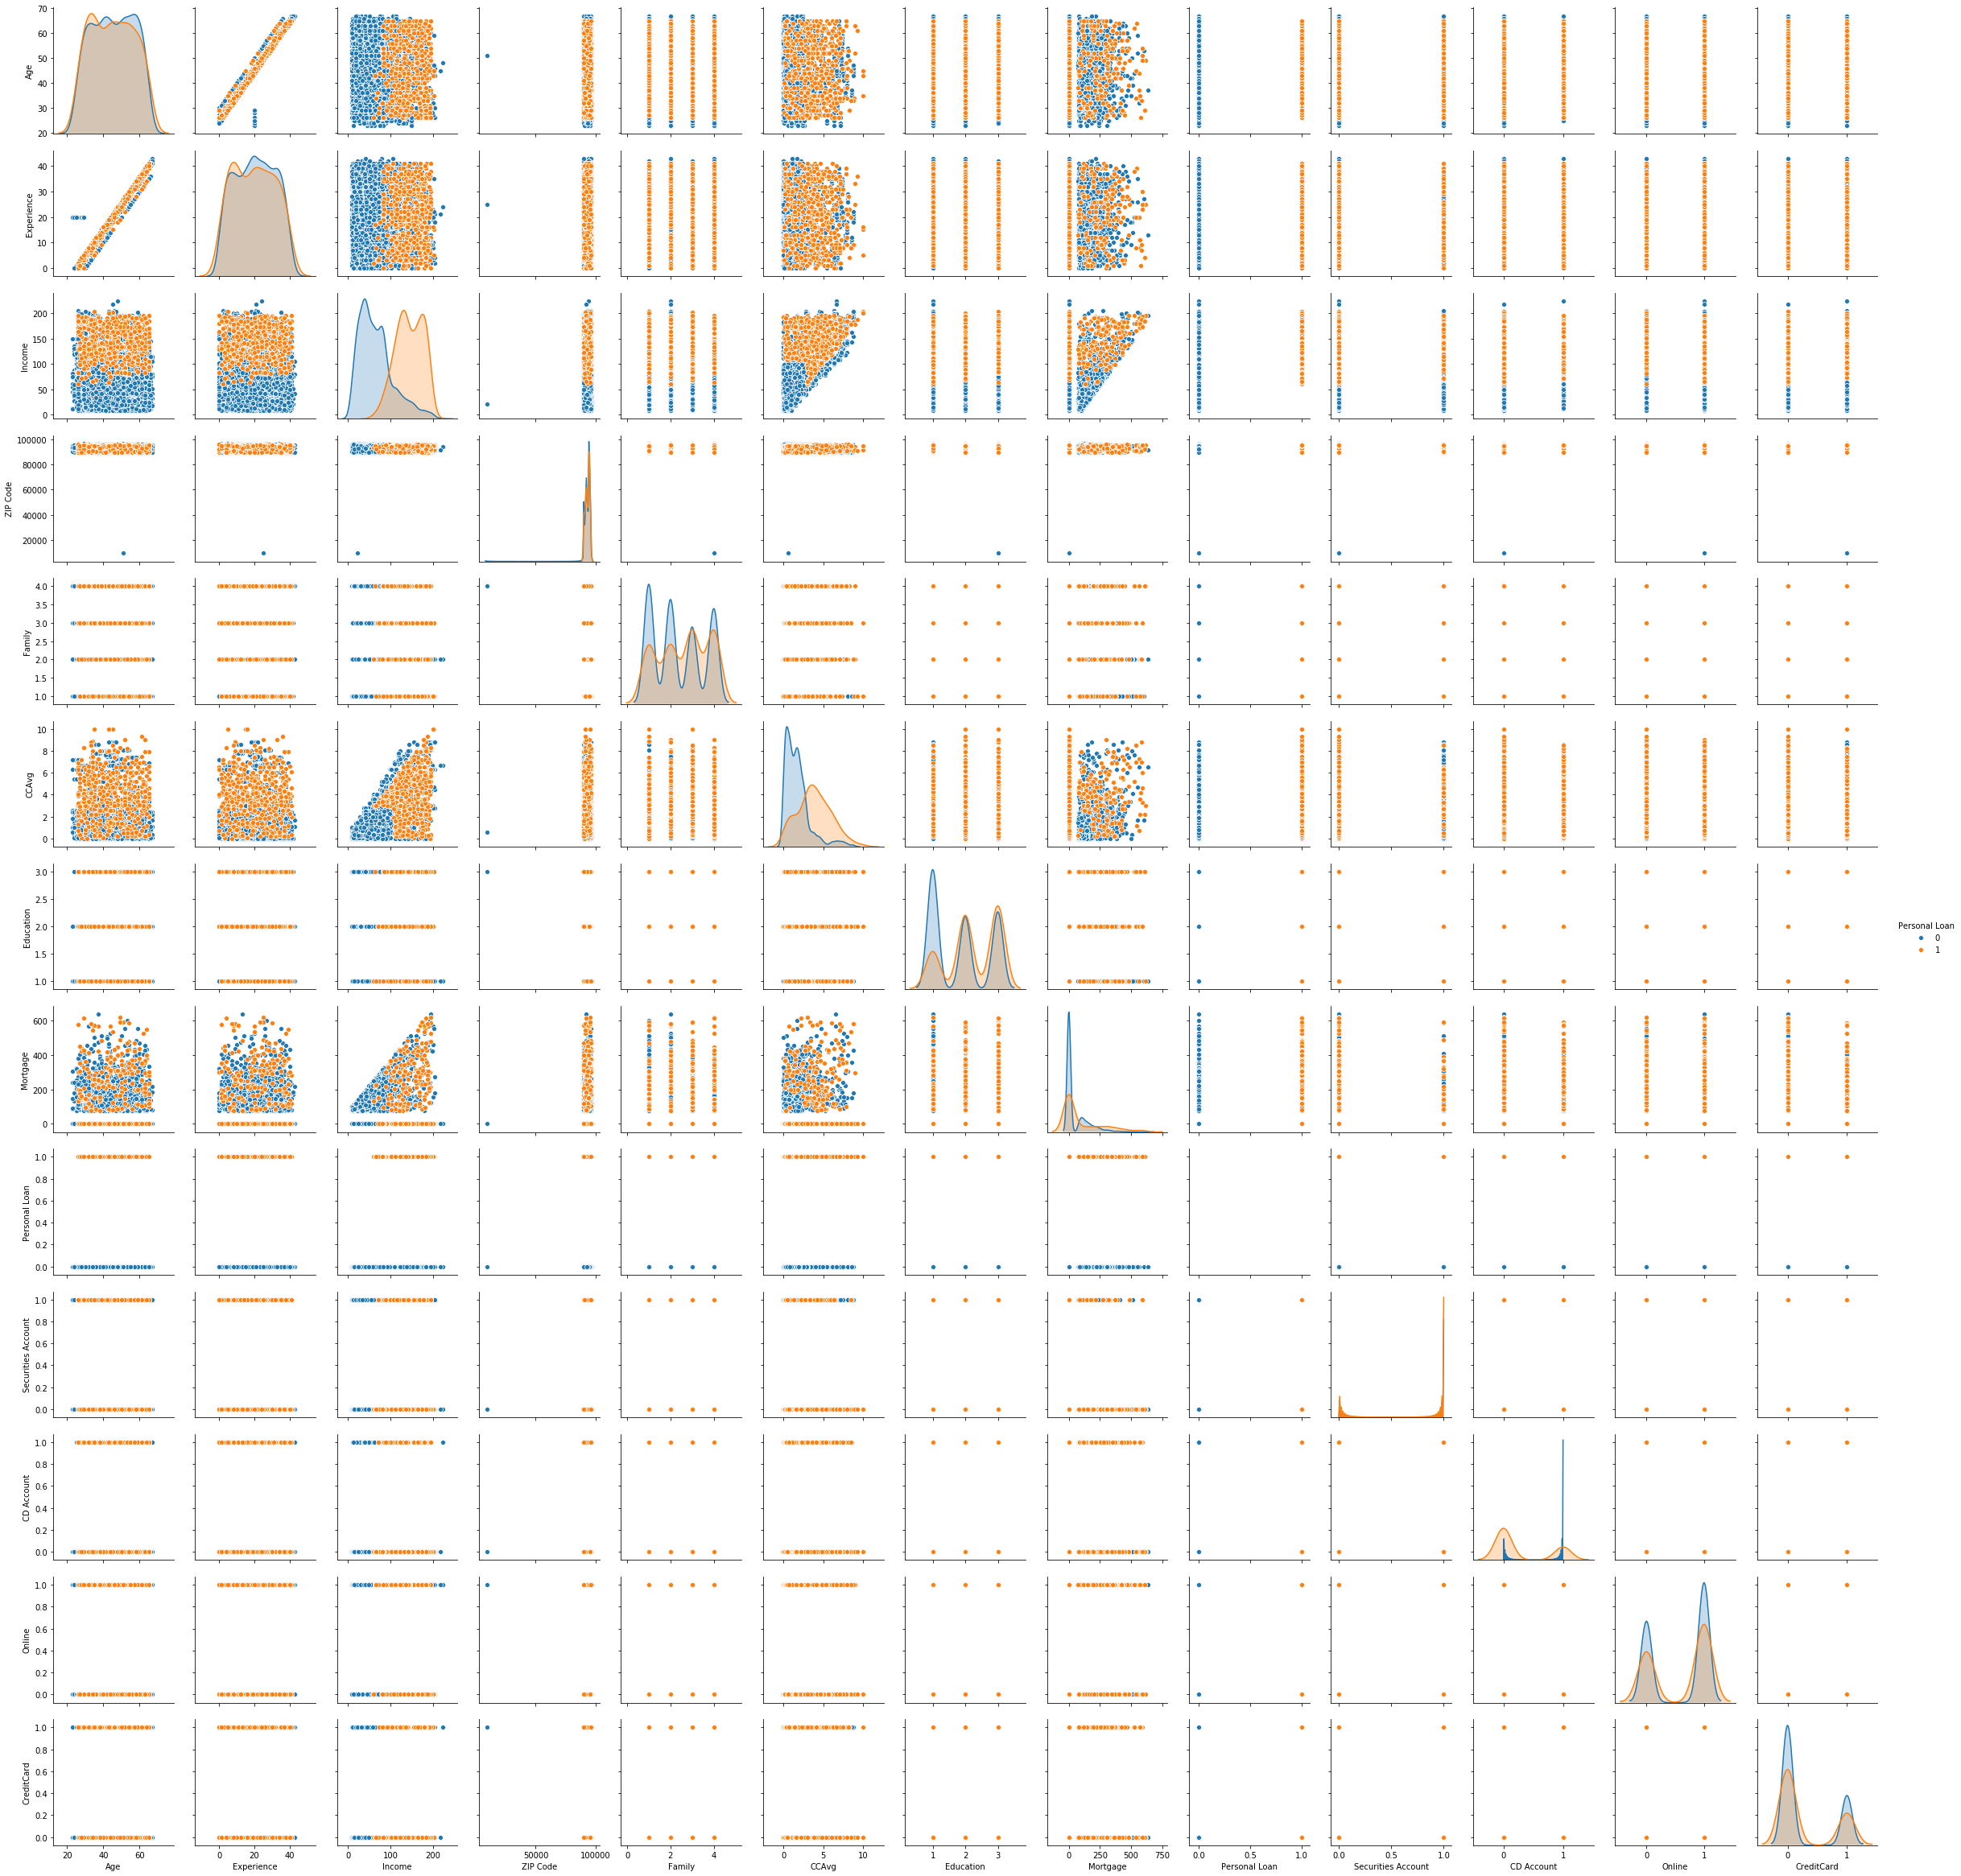

In [26]:
sns.pairplot(loan_df,hue='Personal Loan',diag_kind='kde')

After analysing correlation and pairplot 
* We can see postive correlation between Age and Experience.
* There is a postive correletion between Income and CCAvg, but the correltion which is around 0.6
* And there is a postive correletion between Income and Mortgage, but the correltion which is around 0.2
* As we can see there is no correltaion between ZIP_code and any other independent variable, so we can drop ZIP code column.

In [27]:
loan_df.drop(columns='ZIP Code',inplace=True)

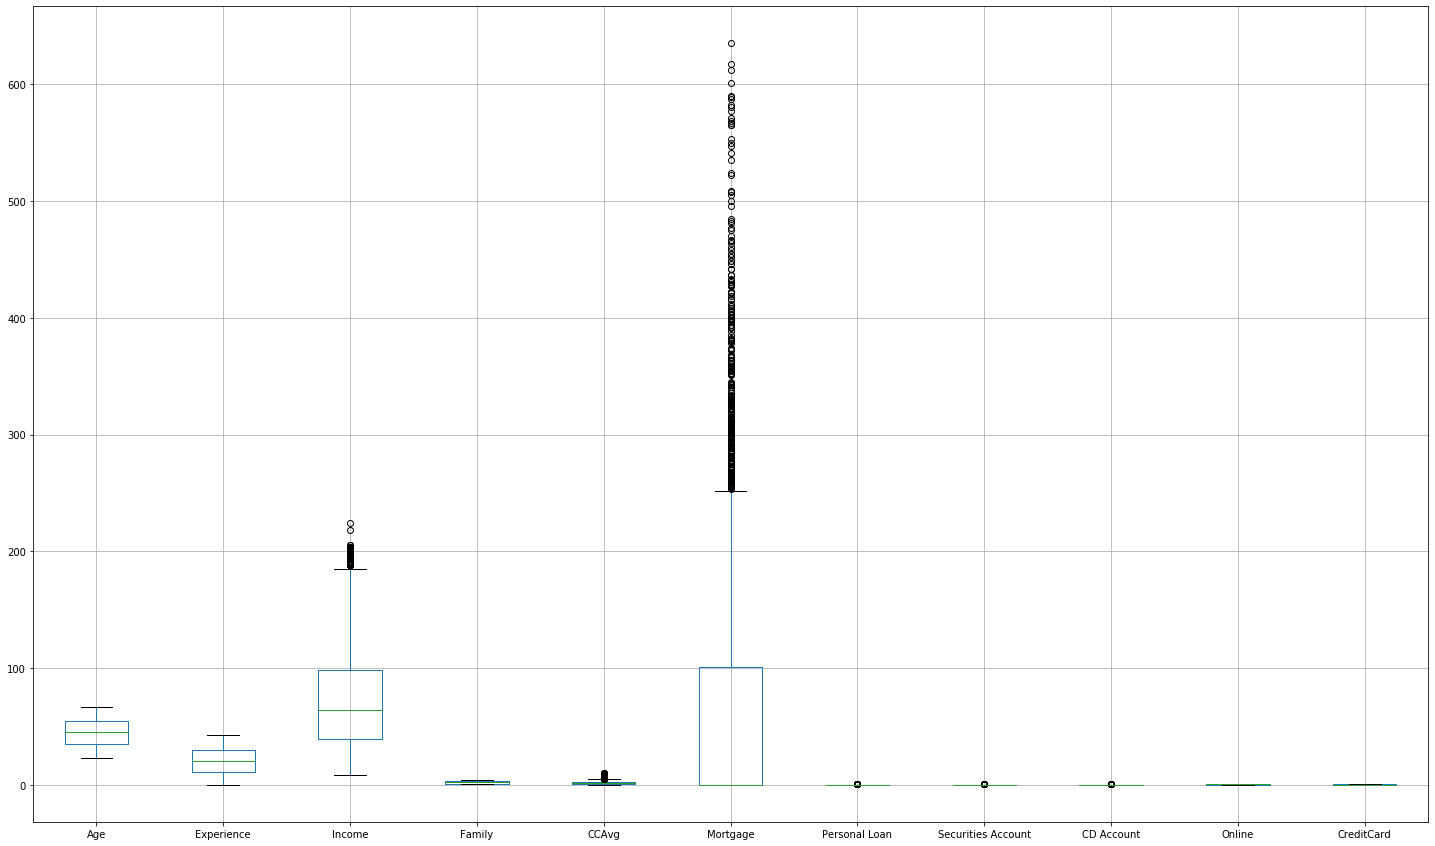

In [28]:
loan_df.boxplot(figsize=(25,15))

* As we can see Mortgage, Income, CCAvg, Securities Account and Cd account have outliers.

In [29]:
print(f'{len(loan_df.loc[loan_df["Personal Loan"] == 1])} ({len(loan_df.loc[loan_df["Personal Loan"] == 1])/len(loan_df.index) * 100}%)')
print(f'{len(loan_df.loc[loan_df["Personal Loan"] == 0])} ({len(loan_df.loc[loan_df["Personal Loan"] == 0])/len(loan_df.index) * 100}%)')

480 (9.6%)
4520 (90.4%)


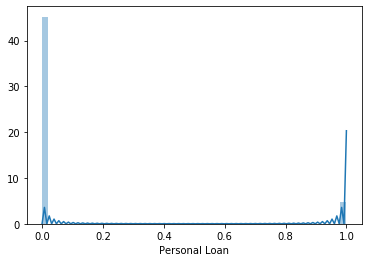

In [30]:
sns.distplot(loan_df['Personal Loan'],bins=50)

* As we can see data is not distributed properly. 
* Data is imbalanced.
* So we use over sampling technique to ovecome this propblem

Personal Loan
0    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

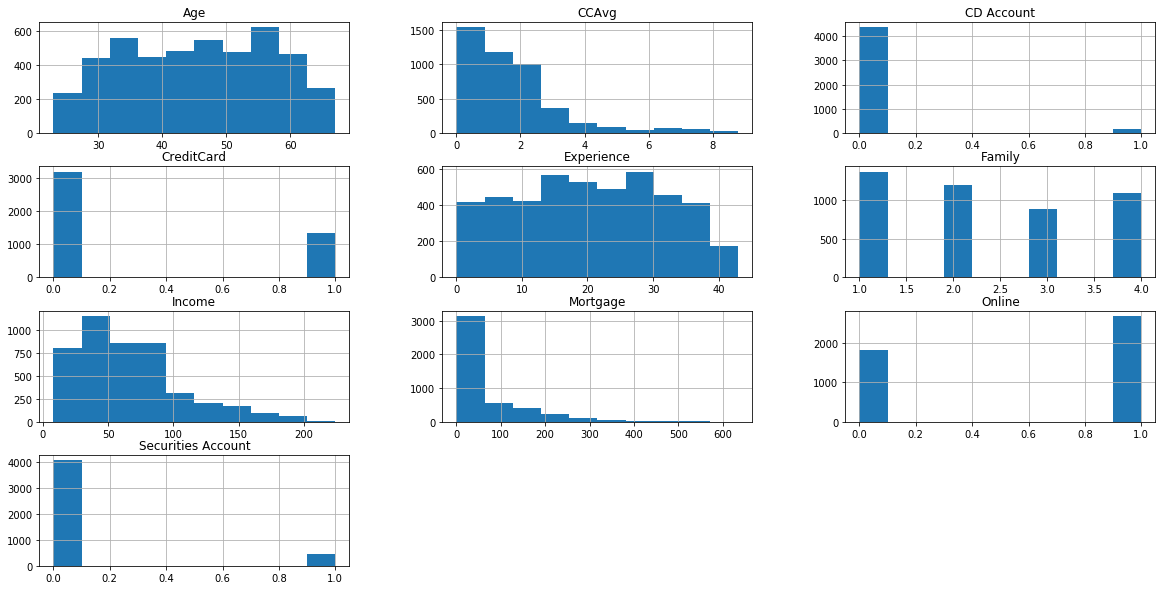

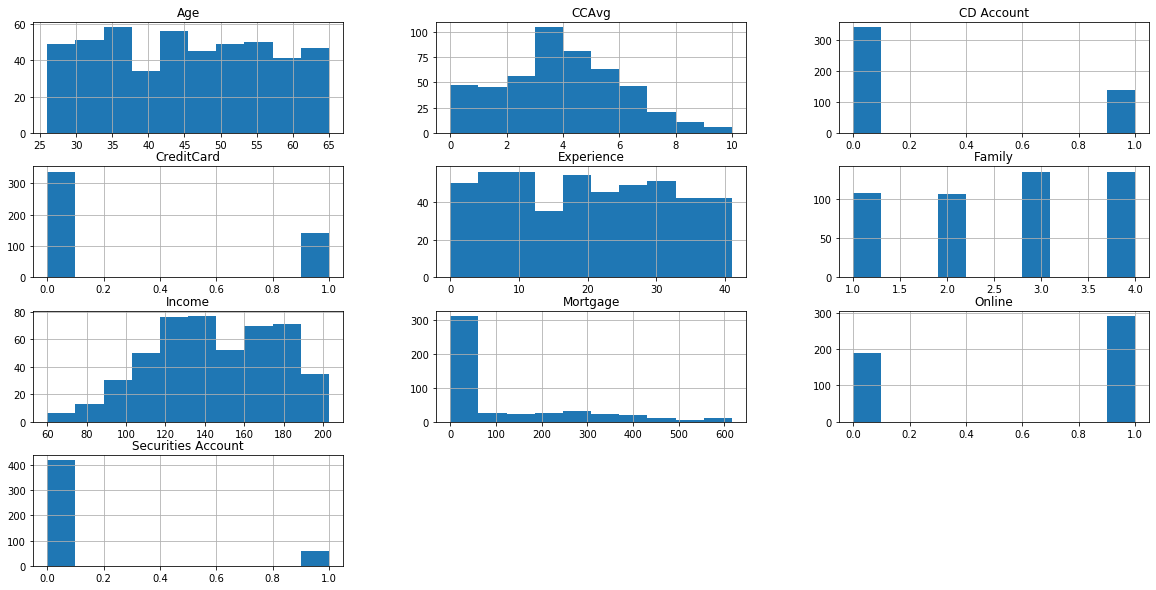

In [31]:
loan_df.groupby('Personal Loan').hist(figsize=(20,10))

* First half of the above hist graph shows  distribution of 'Personal Loan' 0 'Zero' accross feature columns
* And second half of the above hist graph shows  distribution of 'Personal Loan' 1 'One' accross feature columns
* We can see that in both the cases 'Mortgage' is Psotively skewed.

In [32]:
X = loan_df.drop(columns='Personal Loan')
y = loan_df['Personal Loan']

###  SMOTE over sampling

In [33]:
# Here, I am using over smapling technique to increase or match the minority labels with majority labels.
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X,y)

### Train, Test and split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Here I am splitting data in to train and testing data in the ratio of 70:30
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,train_size=0.7,test_size=0.3,random_state=1)

In [36]:
X_test_df = pd.DataFrame(X_test,columns=loan_df.drop(columns='Personal Loan').columns)
y_test_df = pd.DataFrame(y_test,columns=['Personal Loan'])
smote_loan_df_test = pd.concat([X_test_df,y_test_df],axis=1)
print(smote_loan_df_test.shape)
smote_loan_df_test.head(20)

(2712, 12)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,35.000000,5.000000,22.000000,1.000000,0.670000,3.000000,103.000000,0.000000,0.000000,0.000000,0.000000,0
1,41.000000,16.000000,111.000000,2.000000,0.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,33.000000,7.000000,115.000000,1.000000,2.700000,2.000000,283.000000,0.000000,0.000000,1.000000,0.000000,0
3,36.337915,11.662085,123.000000,1.662085,2.763460,2.662085,0.000000,0.337915,0.337915,0.337915,0.000000,1
4,32.000000,7.000000,38.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0
5,37.225776,11.451553,122.096894,1.000000,2.525776,2.000000,0.000000,0.774224,1.000000,1.000000,0.225776,1
6,39.000000,13.000000,59.000000,3.000000,0.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
7,46.000000,22.000000,52.000000,2.000000,2.100000,3.000000,221.000000,0.000000,0.000000,0.000000,0.000000,0
8,41.000000,16.000000,82.000000,1.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0
9,36.222037,11.111018,184.000000,2.111018,5.421953,1.888982,0.000000,0.000000,0.000000,0.111018,0.000000,1


### Scale the data

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
# MinMaxScaler: rescales the data set such that all feature values are in the range [0, 1].
# MinMaxScaler substracts the minimum value in the feture and then devides by the range. 
# The range is the diefference betwween the original maximum and th original minimum.
# And it  preserves the shape of the original distributin.
scale = MinMaxScaler()
X_scaled_train = scale.fit_transform(X_train)
X_scaled_test = scale.fit_transform(X_test)

In [39]:
np.bincount(y_train)

array([3170, 3158])

### common code for plotting roc curve, confusion matrix and classification report

In [40]:
# ROC curve common function
# plot the ROC curve for the model
def rocScore(y_test,y_pred,label):
    ns_probs = [0 for _ in range(len(y_test))]
    n_fpr,n_tpr,n_threshold = roc_curve(y_test,ns_probs)
    fpr,tpr,threshold = roc_curve(y_test,y_pred,pos_label=1)
    plt.plot(n_fpr,n_tpr,linestyle='--',label="No skill")
    plt.plot(fpr,tpr,linestyle="solid",label=f'{label} model (area = {np.round(roc_auc_score(y_test,y_pred),4)})')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend()

In [41]:
#Let's check confusion matrix
def printconfusionMatrixAndClas_Report(y_test,y_test_pred):
    cm = confusion_matrix(y_test,y_test_pred)
    print(f'Confusion matrix : \n {cm}')
    print(f'\n Classification report : \n {classification_report(y_test,y_test_pred)}')
    cm_df = pd.DataFrame(cm,index=[i for i in '01'], columns= [i for i in '01'])
    sns.heatmap(cm_df,annot=True)
    return cm

In [42]:
#Let's 95% confidence of the model by lower and upper range.
def confidenceMeasure(confusion_matrix):
    TP = confusion_matrix[1,1]
    total_positive = len(smote_loan_df_test.loc[smote_loan_df_test['Personal Loan'] == 1])
    alpha = 0.05
    lower, upper = proportion_confint(TP,total_positive,alpha=alpha)
    print(f'TP: {TP} \t total_positive: {total_positive}')
    print(f'Lower: {lower} \t Upper: {upper}')

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
# Building model without hyperparameter tunning.
logistic_model = LogisticRegression()
logistic_model.fit(X_scaled_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
#predict score on training data
lg_y_train_pred = logistic_model.predict(X_scaled_train)
score = np.round(accuracy_score(y_train,lg_y_train_pred),4)
print('Training score:', score)

Training score: 0.9117


In [46]:
#predict score on testing data
lg_y_test_pred = logistic_model.predict(X_scaled_test)
score = np.round(accuracy_score(y_test,lg_y_test_pred),4)
print('Testing score:', score)

Testing score: 0.9108


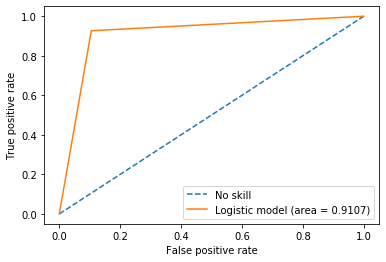

In [47]:
# ROC without parameter tunning
rocScore(y_test,lg_y_test_pred,'Logistic')

Confusion matrix : 
 [[1208  142]
 [ 100 1262]]

 Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      1350
           1       0.90      0.93      0.91      1362

    accuracy                           0.91      2712
   macro avg       0.91      0.91      0.91      2712
weighted avg       0.91      0.91      0.91      2712



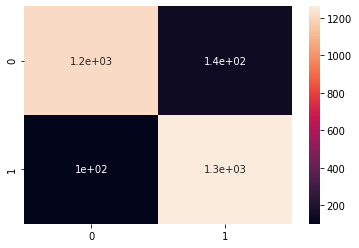

In [48]:
#Confusion matrix and classification report without hyper paramter tunning.
lg_cm = printconfusionMatrixAndClas_Report(y_test,lg_y_test_pred)

In [49]:
# confidence range 95% of Logistic regression model without hyperparameter tunning.
confidenceMeasure(lg_cm)

TP: 1262 	 total_positive: 1362
Lower: 0.9127265729250752 	 Upper: 0.9404305489545136


#### Logistic Model with GridSearchCV 

In [50]:
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
print(hyperparameters)

{'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2']}


In [51]:
clf = GridSearchCV(logistic_model, param_grid = hyperparameters, cv = 5, verbose=True,n_jobs=5)
# Fit on data
best_model = clf.fit(X_scaled_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    5.9s finished


In [52]:
# View best hyperparameters
best_penalty = best_model.best_estimator_.get_params()['penalty']
best_C = best_model.best_estimator_.get_params()['C']
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [68]:
logistic_model_gcv = LogisticRegression(penalty=best_penalty,C=best_C,solver='liblinear')
logistic_model_gcv.fit(X_scaled_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

* Here L1/L2 regularzation technique to avoid model overfitting problem. L1/L2 regularization works with all forms of training.
* C is strength of regularization. Higher values of C correspond to less regularization.


In [69]:
#predict score on training data withh yperparameter
# Building model with hyperparameter tunning.
lg_y_train_pred = logistic_model_gcv.predict(X_scaled_train)
score = np.round(accuracy_score(y_train,lg_y_train_pred),4)
print('Training score:', score)

Training score: 0.9117


In [70]:
#predict score on testing data withh yperparameter
# Building model with hyperparameter tunning.
lg_y_test_pred = logistic_model_gcv.predict(X_scaled_test)
score = np.round(accuracy_score(y_test,lg_y_test_pred),4)
print('Testing score:', score)

Testing score: 0.9108


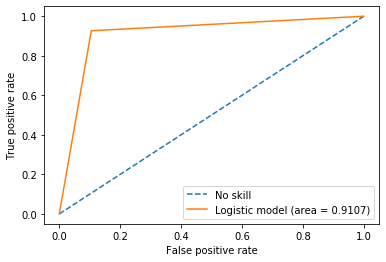

In [71]:
# ROC with parameter tunning
rocScore(y_test,lg_y_test_pred,'Logistic')

Confusion matrix : 
 [[1208  142]
 [ 100 1262]]

 Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      1350
           1       0.90      0.93      0.91      1362

    accuracy                           0.91      2712
   macro avg       0.91      0.91      0.91      2712
weighted avg       0.91      0.91      0.91      2712



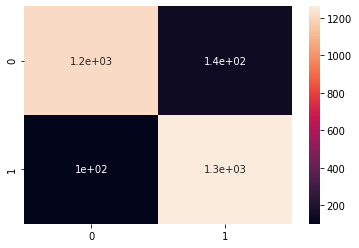

In [72]:
#Confusion matrix and classification report with hyper paramter tunning.
lg_cm_GS = printconfusionMatrixAndClas_Report(y_test,lg_y_test_pred)

In [73]:
# confidence range 95% of Logistic regression model with hyperparameter tunning.
confidenceMeasure(lg_cm_GS)

TP: 1262 	 total_positive: 1362
Lower: 0.9127265729250752 	 Upper: 0.9404305489545136


### KNN model

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
# Building model without hyperparameter tunning.
knn_basic_model = KNeighborsClassifier()
knn_basic_model.fit(X_scaled_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
#predict score on training data
knn_y_train_pred_basic = knn_basic_model.predict(X_scaled_train)
score = np.round(accuracy_score(y_train,knn_y_train_pred_basic),4)
print('Training score:', score)

Training score: 0.9886


In [77]:
#predict score on training data
knn_y_test_pred_basic = knn_basic_model.predict(X_scaled_test)
score = np.round(accuracy_score(y_test,knn_y_test_pred_basic),4)
print('Testing score:', score)

Testing score: 0.9764


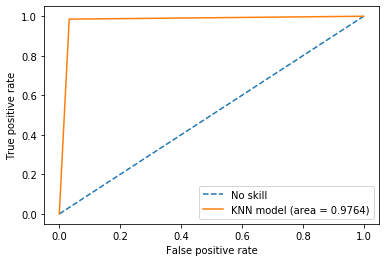

In [78]:
# ROC without parameter tunning
rocScore(y_test,knn_y_test_pred_basic,'KNN')

Confusion matrix : 
 [[1306   44]
 [  20 1342]]

 Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1350
           1       0.97      0.99      0.98      1362

    accuracy                           0.98      2712
   macro avg       0.98      0.98      0.98      2712
weighted avg       0.98      0.98      0.98      2712



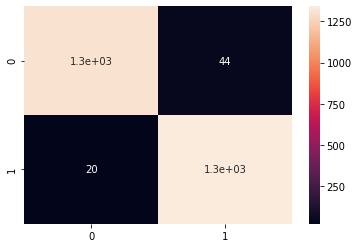

In [79]:
#Confusion matrix and classification report without hyper paramter tunning.
knn_cm = printconfusionMatrixAndClas_Report(y_test,knn_y_test_pred_basic)

In [80]:
# confidence range 95% of KNN Classifier model without hyperparameter tunning.
confidenceMeasure(knn_cm)

TP: 1342 	 total_positive: 1362
Lower: 0.9789275830727371 	 Upper: 0.9917038413031807


#### KNN classifier Model with GridSearchCV

In [99]:
# Create n_neighbors, to figure out best 'k' numbers of neighbors
n_neighbors = np.arange(1,10,2)
# algortihm to compute best neighbors
algo = ['auto', 'ball_tree', 'kd_tree', 'brute']
# Create leaf_size
leaf_size = np.arange(1, 50, 1)
# Create hyperparameter options
hyperparameters = dict(n_neighbors=n_neighbors,leaf_size=leaf_size,algorithm=algo)
print(hyperparameters)

{'n_neighbors': array([1, 3, 5, 7, 9]), 'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}


Grid Search CV for KNN Classifier

In [100]:
clf = GridSearchCV(knn_basic_model, param_grid = hyperparameters, cv = 5, verbose=True,n_jobs=5)
# Fit on data
knn_best_model = clf.fit(X_scaled_train, y_train)

Fitting 5 folds for each of 980 candidates, totalling 4900 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    3.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   15.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:   28.9s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:   46.9s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:  2.0min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed:  2.9min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed:  3.5min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed:  4.5min
[Parallel(n_jobs=5)]: Done 4900 out of 4900 | elapsed:  5.7min finished


In [101]:
# View best hyperparameters for KNN
best_n_neighbors = knn_best_model.best_estimator_.get_params()['n_neighbors']
best_leaf_size = knn_best_model.best_estimator_.get_params()['leaf_size']
best_algo = knn_best_model.best_estimator_.get_params()['algorithm']
print('Best K value or n_neighbors:', knn_best_model.best_estimator_.get_params()['n_neighbors'])
print('Best leaf_size:', knn_best_model.best_estimator_.get_params()['leaf_size'])
print('Best algorithm:', knn_best_model.best_estimator_.get_params()['algorithm'])

Best K value or n_neighbors: 1
Best leaf_size: 1
Best algorithm: auto


KNN Classifier with optimum K value and leaf size after Grid search CV

In [102]:
# KNN Classifier with optimum K and leaf size
# Building model with hyperparameter tunning.
knn_model = KNeighborsClassifier(algorithm =best_algo, n_neighbors=best_n_neighbors, leaf_size=best_leaf_size)
knn_model.fit(X_scaled_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [103]:
#predict score on training data
# Building model with hyperparameter tunning.
knn_y_train_pred = knn_model.predict(X_scaled_train)
score = np.round(accuracy_score(y_train,knn_y_train_pred),4)
print('Training score:', score)

Training score: 1.0


In [104]:
#predict score on training data
# Building model with hyperparameter tunning.
knn_y_test_pred = knn_model.predict(X_scaled_test)
score = np.round(accuracy_score(y_test,knn_y_test_pred),4)
print('Testing score:', score)

Testing score: 0.986


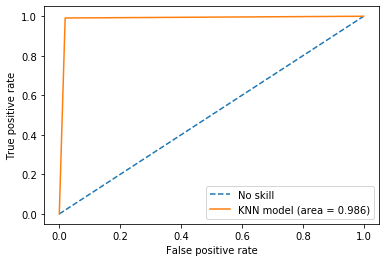

In [105]:
# ROC with parameter tunning
rocScore(y_test,knn_y_test_pred,'KNN')

Confusion matrix : 
 [[1324   26]
 [  12 1350]]

 Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1350
           1       0.98      0.99      0.99      1362

    accuracy                           0.99      2712
   macro avg       0.99      0.99      0.99      2712
weighted avg       0.99      0.99      0.99      2712



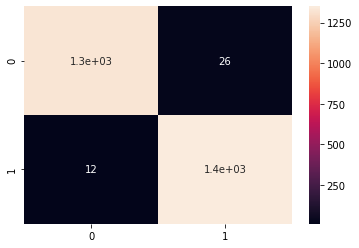

In [106]:
#Confusion matrix and classification report with hyper paramter tunning.
knn_cm_GS = printconfusionMatrixAndClas_Report(y_test,knn_y_test_pred)

In [107]:
# confidence range 95% of KNN Classifier model with hyperparameter tunning.
confidenceMeasure(knn_cm_GS)

TP: 1350 	 total_positive: 1362
Lower: 0.9862264768891169 	 Upper: 0.9961523777364338


* Before using gridsearchcv parametre tuning the model accuracy remains was 0.97
* After using gridsearchcv parametre tuning the model accuracy remains was 0.98
* I selected n_neighbors and leaf_size paramter tuning.
* n_neighbors: needs to be odd values, more than 0 'zero'. Based on distance fucntion figure out nearest neighbors.
* algortihm: to compute best neighbors.

### Naive bayes.

In [81]:
#I am using naive bayes MultinomialNB algorithm. because feature variables are descrete counts.

In [82]:
from sklearn.naive_bayes import MultinomialNB

In [83]:
mnb_model_basic = MultinomialNB()
mnb_model_basic.fit(X_scaled_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [84]:
#predict score on training data
# Building model without hyperparameter tunning.
mnb_y_train_pred = mnb_model_basic.predict(X_scaled_train)
score = np.round(accuracy_score(y_train,mnb_y_train_pred),4)
print('Training score:', score)

Training score: 0.7955


In [85]:
#predict score on testing data
# Building model without hyperparameter tunning.
mnb_y_test_pred = mnb_model_basic.predict(X_scaled_test)
score = np.round(accuracy_score(y_test,mnb_y_test_pred),4)
print('Testing score:', score)

Testing score: 0.7998


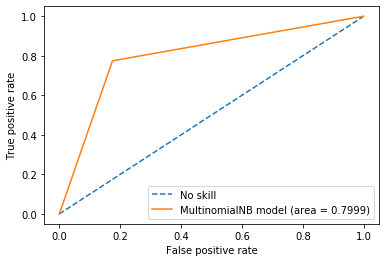

In [86]:
# ROC without parameter tunning
rocScore(y_test,mnb_y_test_pred,'MultinomialNB')

Confusion matrix : 
 [[1114  236]
 [ 307 1055]]

 Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      1350
           1       0.82      0.77      0.80      1362

    accuracy                           0.80      2712
   macro avg       0.80      0.80      0.80      2712
weighted avg       0.80      0.80      0.80      2712



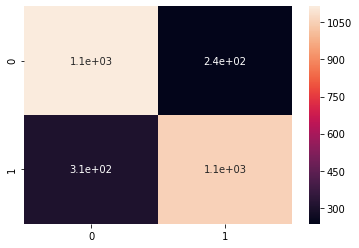

In [87]:
#Confusion matrix and classification report without hyper paramter tunning.
mnb_cm = printconfusionMatrixAndClas_Report(y_test,mnb_y_test_pred)

In [88]:
# confidence range 95% of MultinomialNB model without hyperparameter tunning.
confidenceMeasure(mnb_cm)

TP: 1055 	 total_positive: 1362
Lower: 0.7524051323277489 	 Upper: 0.7967872318425889


### MultinomialNB with GridSearchCV

In [89]:
# Create alpha
alpha = np.arange(0.0,10.0,0.1)
# hyperparameters = dict(alpha=alpha)
hyperparameters = dict(alpha=alpha, fit_prior=[True, False])
print(hyperparameters)

{'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]), 'fit_prior': [True, False]}


In [90]:
clf = GridSearchCV(mnb_model_basic, param_grid = hyperparameters, cv = 5, verbose=True,n_jobs=5)
# Fit on data
mnb_best_model = clf.fit(X_scaled_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  49 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 1000 out of 1000 | elapsed:    3.6s finished


In [91]:
# View best hyperparameters for Multinomial
print('Best alpha:', mnb_best_model.best_estimator_.get_params()['alpha'])
print('Best fit_prior:', mnb_best_model.best_estimator_.get_params()['fit_prior'])

Best alpha: 0.0
Best fit_prior: True


In [92]:
mnb_model = MultinomialNB(alpha=mnb_best_model.best_estimator_.get_params()['alpha'],fit_prior=mnb_best_model.best_estimator_.get_params()['fit_prior'])
mnb_model.fit(X_scaled_train,y_train)

MultinomialNB(alpha=0.0, class_prior=None, fit_prior=True)

In [93]:
#predict score on training data
# Building model with hyperparameter tunning.
mnb_y_train_pred = mnb_model.predict(X_scaled_train)
score = np.round(accuracy_score(y_train,mnb_y_train_pred),4)
print('Training score:', score)

Training score: 0.7957


In [94]:
#predict score on testing data
# Building model with hyperparameter tunning.
mnb_y_test_pred = mnb_model.predict(X_scaled_test)
score = np.round(accuracy_score(y_test,mnb_y_test_pred),4)
print('Testing score:', score)

Testing score: 0.7998


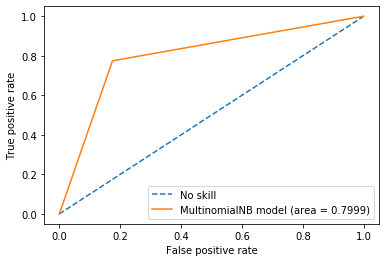

In [95]:
# ROC with parameter tunning
rocScore(y_test,mnb_y_test_pred,'MultinomialNB')

Confusion matrix : 
 [[1114  236]
 [ 307 1055]]

 Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      1350
           1       0.82      0.77      0.80      1362

    accuracy                           0.80      2712
   macro avg       0.80      0.80      0.80      2712
weighted avg       0.80      0.80      0.80      2712



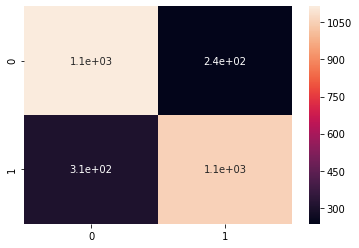

In [96]:
#Confusion matrix and classification report without hyper paramter tunning.
mnb_cm_GS = printconfusionMatrixAndClas_Report(y_test,mnb_y_test_pred)

In [98]:
# confidence range 95% of MultinomialNB model with hyperparameter tunning.
confidenceMeasure(mnb_cm_GS)

TP: 1055 	 total_positive: 1362
Lower: 0.7524051323277489 	 Upper: 0.7967872318425889


* Before and after using gridsearchcv parameter tuning the model accuracy remains same. 0.7998
* I am mainly concetraing on alpha parameter which is for smoothing.